In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np

In [2]:
# positive samples
X0 = [0, 1, 1, 0.5 , 2.1, 0, 1.3]
Y0 = [0, 1, 0.5, 1, 0.1, 2, 1.2]
# negative samples
X1 = [3, 3, 4, 1, 4, 2, 0, 3]
Y1 = [3, 4, 4, 4, 1, 3, 3.5, 0.7]

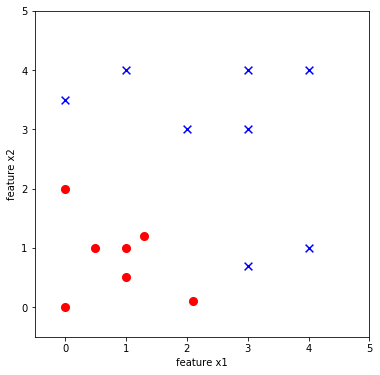

In [3]:
plt.figure(figsize = (6, 6))
plt.xlim((-0.5, 5));plt.ylim((-0.5, 5))
plt.xlabel('feature x1');plt.ylabel('feature x2')
plt.scatter(X0, Y0, s=50, marker='o', c='r', linewidths=2)
plt.scatter(X1, Y1, s=60, marker='x', c='b', linewidths=2)
plt.show()

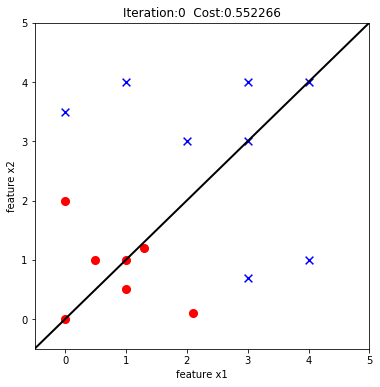

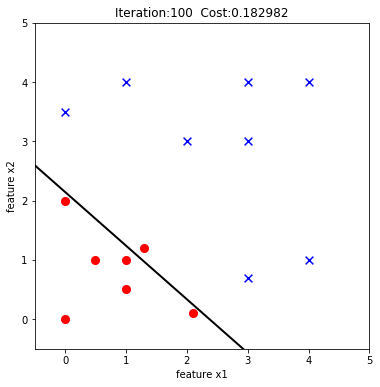

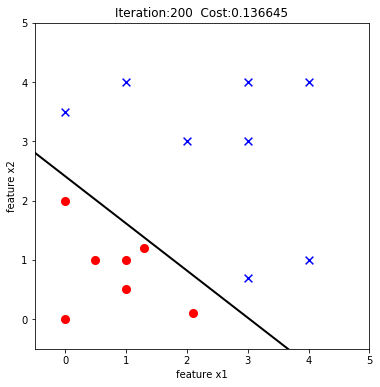

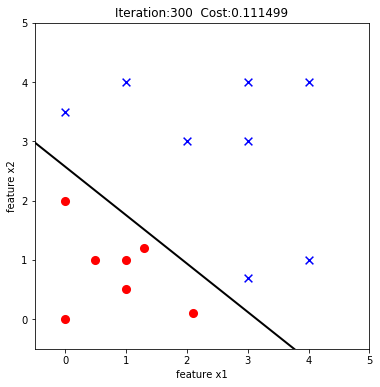

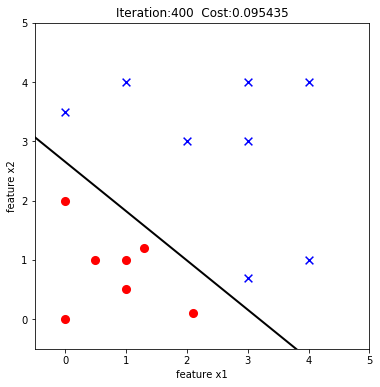

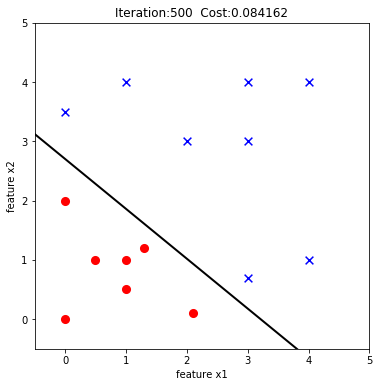

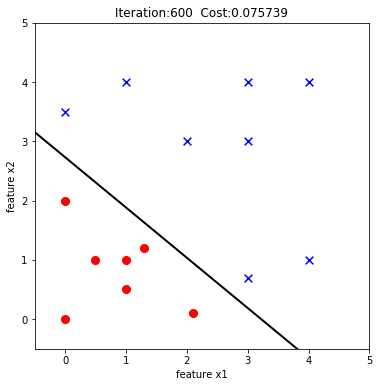

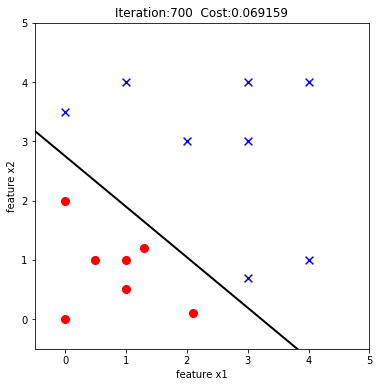

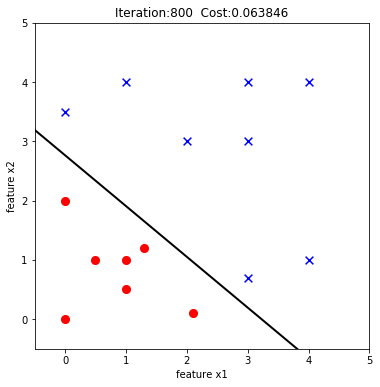

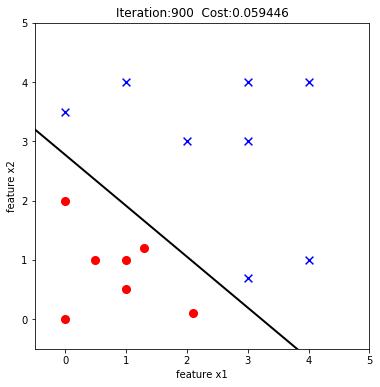

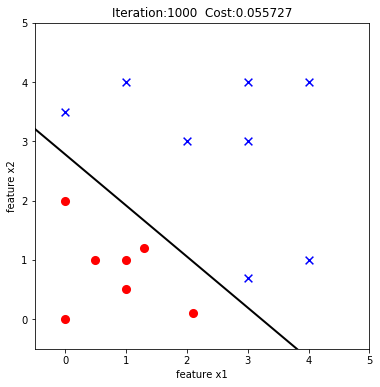

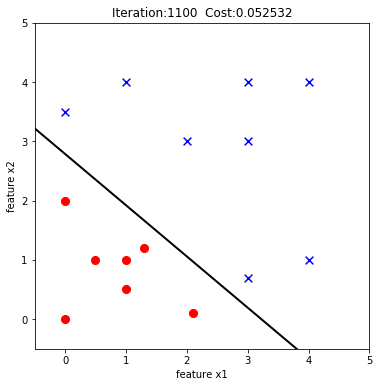

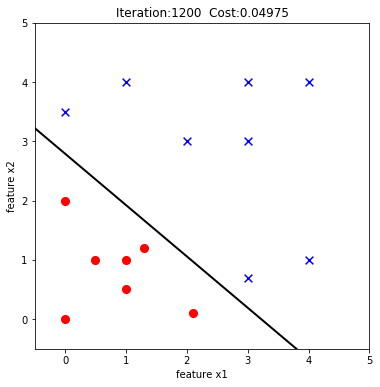

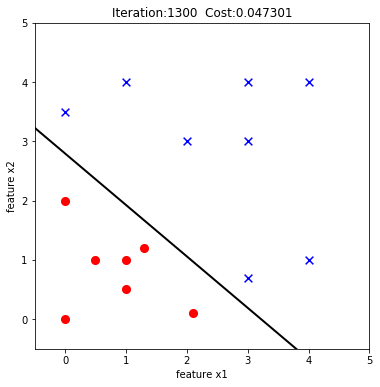

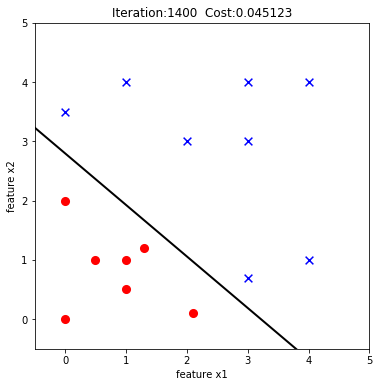

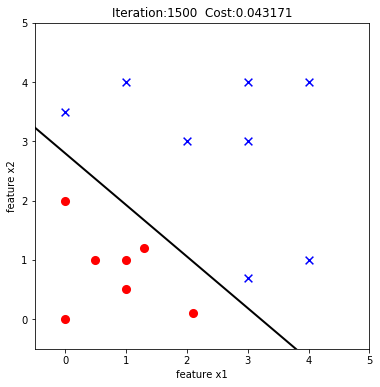

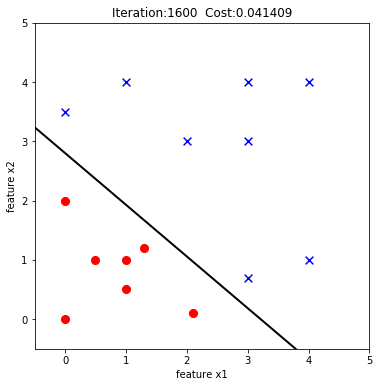

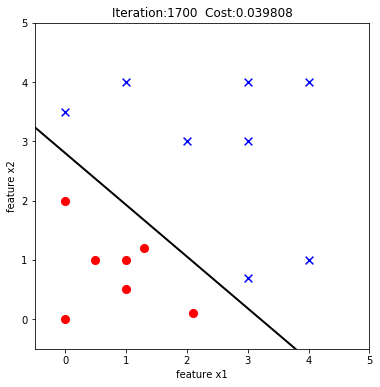

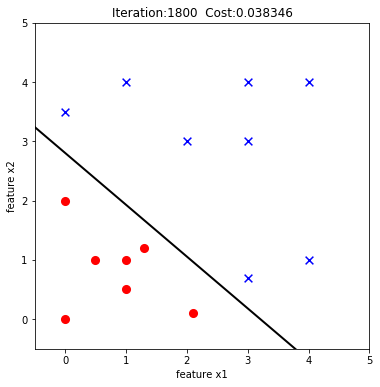

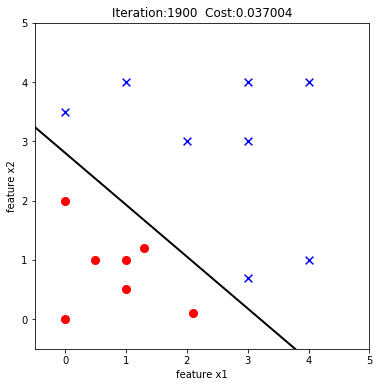

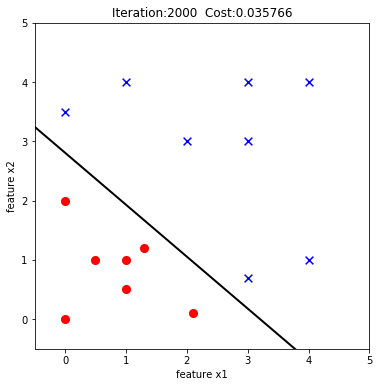

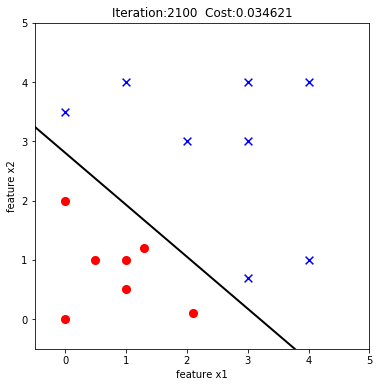

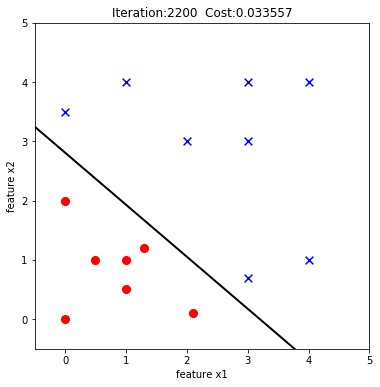

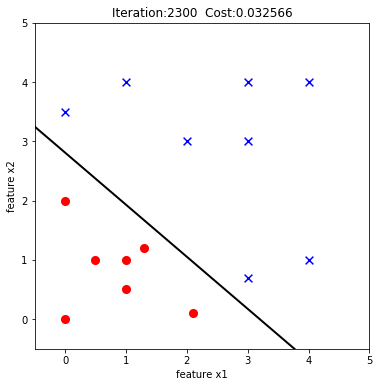

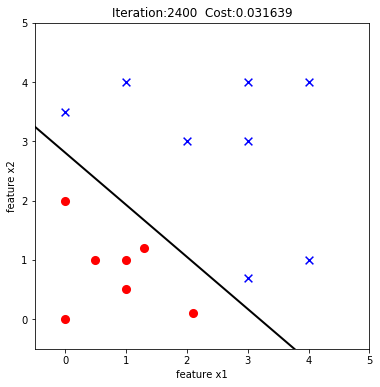

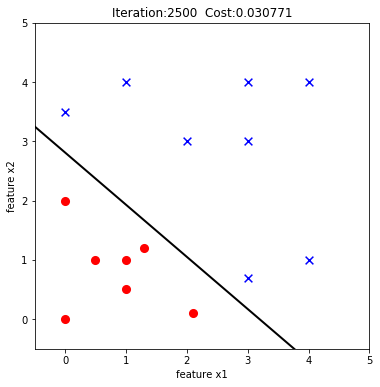

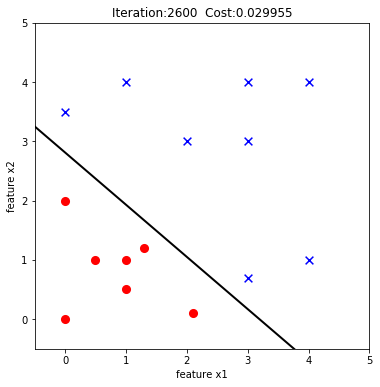

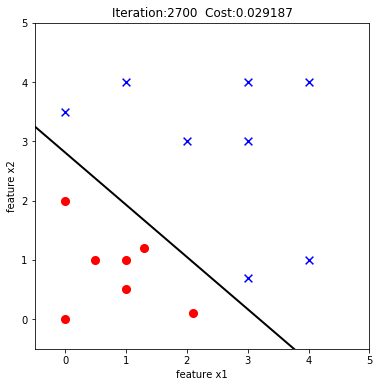

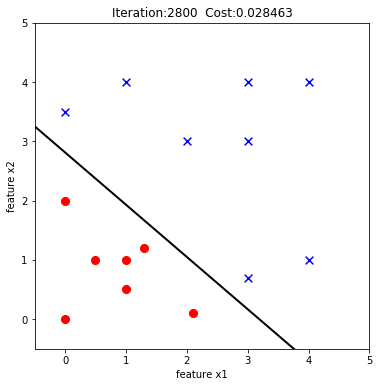

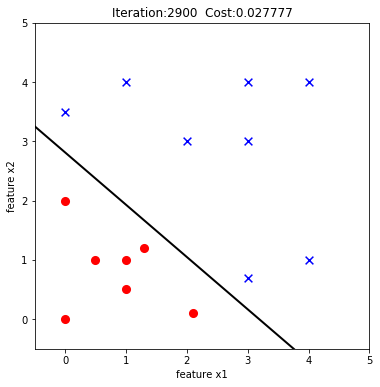

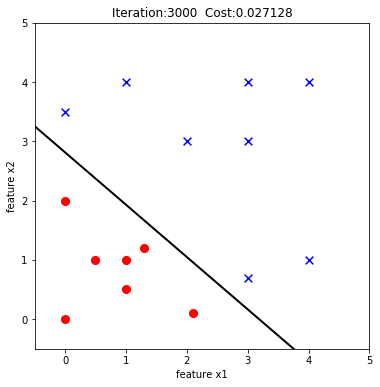

In [4]:
theta0, theta1, theta2 = 0, -1, 1
alpha = 0.1

for iteration in range(0, 3001):
    J, dtheta0, dtheta1, dtheta2 = 0, 0, 0, 0
    for i in range(len(X0)):
        J = J - math.log(1/(1+math.e**(-theta0-theta1*X0[i]-theta2 * Y0[i])))
        dtheta0 += 1/(1+math.e**(-theta0-theta1*X0[i]-theta2 * Y0[i]))-1
        dtheta1 += (1/(1+math.e**(-theta0-theta1*X0[i]-theta2 * Y0[i]))-1)*X0[i]
        dtheta2 += (1/(1+math.e**(-theta0-theta1*X0[i]-theta2 * Y0[i]))-1)*Y0[i]
    for i in range(len(X1)):
        J = J - math.log(1 - 1/(1+math.e**(-theta0-theta1*X1[i]-theta2 * Y1[i])))
        dtheta0 += 1/(1+math.e**(-theta0-theta1*X1[i]-theta2 * Y1[i]))
        dtheta1 += (1/(1+math.e**(-theta0-theta1*X1[i]-theta2 * Y1[i])))*X1[i]
        dtheta2 += (1/(1+math.e**(-theta0-theta1*X1[i]-theta2 * Y1[i])))*Y1[i]
        
    J /= (2 * (len(X0) + len(X1)))
    dtheta0 /= (len(X0) + len(X1))
    dtheta1 /= (len(X0) + len(X1))
    dtheta2 /= (len(X0) + len(X1))
    
    if iteration % 100 == 0:
        x1, x2 = -1, 5
        y1 = -(theta0 + theta1 * x1) / (theta2 + 0.00000001)
        y2 = -(theta0 + theta1 * x2) / (theta2 + 0.00000001)
        plt.figure(figsize = (6, 6))
        plt.xlim((-0.5, 5));plt.ylim((-0.5, 5))
        plt.xlabel('feature x1');plt.ylabel('feature x2')
        plt.scatter(X0, Y0, s=50, marker='o', c='r', linewidths=2)
        plt.scatter(X1, Y1, s=60, marker='x', c='b', linewidths=2)
        plt.plot([x1, x2], [y1, y2], c='black', linewidth=2)
        plt.title('Iteration:' + '%s' % iteration + '  Cost:' + '%s'% round(J, 6))
        plt.show() 
    
    theta0 -= alpha * dtheta0
    theta1 -= alpha * dtheta1
    theta2 -= alpha * dtheta2

In [5]:
[theta0, theta1, theta2]

[8.261488625294517, -2.5912211829655316, -2.9365413273994285]

In [6]:
# quadratic, no regularization
# theta0 + theta1*x1 + theta2*x2 + theta3*(x1**2) + theta4*(x2**2)
theta0, theta1, theta2, theta3, theta4 = 0, 0, 0, 0, 0
alpha = 0.1

for iteration in range(0, 3001):
    J, dtheta0, dtheta1, dtheta2, dtheta3, dtheta4 = 0, 0, 0, 0, 0, 0 
    for i in range(len(X0)): 
        # positive samples
        J = J - math.log(1/(1+math.e**(-theta0-theta1*X0[i]-theta2*Y0[i]-theta3*(X0[i]**2)-theta4*(Y0[i]**2))))
        dtheta0 += 1/(1+math.e**(-theta0-theta1*X0[i]-theta2 * Y0[i]-theta3*(X0[i]**2)-theta4*(Y0[i]**2)))-1
        dtheta1 += (1/(1+math.e**(-theta0-theta1*X0[i]-theta2 * Y0[i]-theta3*(X0[i]**2)-theta4*(Y0[i]**2)))-1)*X0[i]
        dtheta2 += (1/(1+math.e**(-theta0-theta1*X0[i]-theta2 * Y0[i]-theta3*(X0[i]**2)-theta4*(Y0[i]**2)))-1)*Y0[i]
        dtheta3 += (1/(1+math.e**(-theta0-theta1*X0[i]-theta2 * Y0[i]-theta3*(X0[i]**2)-theta4*(Y0[i]**2)))-1)*(X0[i]**2)
        dtheta4 += (1/(1+math.e**(-theta0-theta1*X0[i]-theta2 * Y0[i]-theta3*(X0[i]**2)-theta4*(Y0[i]**2)))-1)*(Y0[i]**2)
    for i in range(len(X1)): 
        # negative samples
        J = J - math.log(1 - 1/(1+math.e**(-theta0-theta1*X1[i]-theta2*Y1[i]-theta3*(X1[i]**2)-theta4*(Y1[i]**2))))
        dtheta0 += 1/(1+math.e**(-theta0-theta1*X1[i]-theta2*Y1[i]-theta3*(X1[i]**2)-theta4*(Y1[i]**2)))
        dtheta1 += (1/(1+math.e**(-theta0-theta1*X1[i]-theta2*Y1[i]-theta3*(X1[i]**2)-theta4*(Y1[i]**2))))*X1[i]
        dtheta2 += (1/(1+math.e**(-theta0-theta1*X1[i]-theta2*Y1[i]-theta3*(X1[i]**2)-theta4*(Y1[i]**2))))*Y1[i]
        dtheta3 += (1/(1+math.e**(-theta0-theta1*X1[i]-theta2*Y1[i]-theta3*(X1[i]**2)-theta4*(Y1[i]**2))))*(X1[i]**2)
        dtheta4 += (1/(1+math.e**(-theta0-theta1*X1[i]-theta2*Y1[i]-theta3*(X1[i]**2)-theta4*(Y1[i]**2))))*(Y1[i]**2)
        
    J /= (2 * (len(X0) + len(X1)))
    dtheta0 /= (len(X0) + len(X1))
    dtheta1 /= (len(X0) + len(X1))
    dtheta2 /= (len(X0) + len(X1))
    dtheta3 /= (len(X0) + len(X1))
    dtheta4 /= (len(X0) + len(X1))
    
    theta0 -= alpha * dtheta0
    theta1 -= alpha * dtheta1
    theta2 -= alpha * dtheta2
    theta3 -= alpha * dtheta3
    theta4 -= alpha * dtheta4

In [7]:
[theta0, theta1, theta2, theta3, theta4]

[5.335735428026436,
 2.3931216388027425,
 1.8522623979401052,
 -1.82176387010233,
 -1.428381490439235]

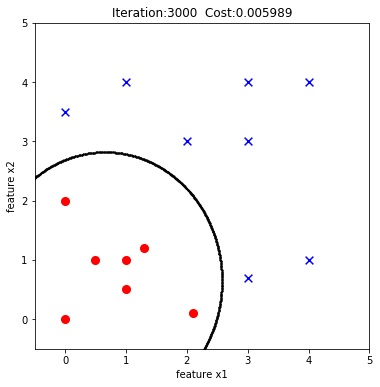

In [8]:
plt.figure(figsize = (6, 6))
plt.xlim((-0.5, 5));plt.ylim((-0.5, 5))
plt.xlabel('feature x1');plt.ylabel('feature x2')
plt.scatter(X0, Y0, s=50, marker='o', c='r', linewidths=2)
plt.scatter(X1, Y1, s=60, marker='x', c='b', linewidths=2)

x1 = np.linspace(-1, 5, 600)
a = theta4
b = theta2
for i in x1:
    c = theta0 + theta1 * i + theta3 * (i**2)
    if (b**2 - 4*a*c) < 0:
        continue
    
    r1 = (-b + math.sqrt(b**2 - 4*a*c)) / (2*a)
    r2 = (-b - math.sqrt(b**2 - 4*a*c)) / (2*a)
    plt.plot(i, r1, marker='o', color='black', markersize=1)
    plt.plot(i, r2, marker='o', color='black', markersize=1)
    
x2 = np.linspace(-1, 5, 600)
a = theta3
b = theta1
for i in x2:
    c = theta0 + theta2 * i + theta4 * (i**2)
    if (b**2 - 4*a*c) < 0:
        continue
    
    r1 = (-b + math.sqrt(b**2 - 4*a*c)) / (2*a)
    r2 = (-b - math.sqrt(b**2 - 4*a*c)) / (2*a)
    plt.plot(r1, i, marker='o', color='black', markersize=1)
    plt.plot(r2, i, marker='o', color='black', markersize=1)
    
    
plt.title('Iteration:' + '%s' % iteration + '  Cost:' + '%s'% round(J, 6))
plt.show() 

In [9]:
# quadratic, with regularization
# theta0 + theta1*x1 + theta2*x2 + theta3*(x1**2) + theta4*(x2**2)
theta0, theta1, theta2, theta3, theta4 = 0, 0, 0, 0, 0
alpha = 0.1
lamda = 1

for iteration in range(0, 3001):
    J, dtheta0, dtheta1, dtheta2, dtheta3, dtheta4 = 0, 0, 0, 0, 0, 0 
    for i in range(len(X0)): 
        # positive samples
        J = J - math.log(1/(1+math.e**(-theta0-theta1*X0[i]-theta2*Y0[i]-theta3*(X0[i]**2)-theta4*(Y0[i]**2))))
        dtheta0 += 1/(1+math.e**(-theta0-theta1*X0[i]-theta2 * Y0[i]-theta3*(X0[i]**2)-theta4*(Y0[i]**2)))-1
        dtheta1 += (1/(1+math.e**(-theta0-theta1*X0[i]-theta2 * Y0[i]-theta3*(X0[i]**2)-theta4*(Y0[i]**2)))-1)*X0[i]
        dtheta2 += (1/(1+math.e**(-theta0-theta1*X0[i]-theta2 * Y0[i]-theta3*(X0[i]**2)-theta4*(Y0[i]**2)))-1)*Y0[i]
        dtheta3 += (1/(1+math.e**(-theta0-theta1*X0[i]-theta2 * Y0[i]-theta3*(X0[i]**2)-theta4*(Y0[i]**2)))-1)*(X0[i]**2)
        dtheta4 += (1/(1+math.e**(-theta0-theta1*X0[i]-theta2 * Y0[i]-theta3*(X0[i]**2)-theta4*(Y0[i]**2)))-1)*(Y0[i]**2)
    for i in range(len(X1)): 
        # negative samples
        J = J - math.log(1 - 1/(1+math.e**(-theta0-theta1*X1[i]-theta2*Y1[i]-theta3*(X1[i]**2)-theta4*(Y1[i]**2))))
        dtheta0 += 1/(1+math.e**(-theta0-theta1*X1[i]-theta2*Y1[i]-theta3*(X1[i]**2)-theta4*(Y1[i]**2)))
        dtheta1 += (1/(1+math.e**(-theta0-theta1*X1[i]-theta2*Y1[i]-theta3*(X1[i]**2)-theta4*(Y1[i]**2))))*X1[i]
        dtheta2 += (1/(1+math.e**(-theta0-theta1*X1[i]-theta2*Y1[i]-theta3*(X1[i]**2)-theta4*(Y1[i]**2))))*Y1[i]
        dtheta3 += (1/(1+math.e**(-theta0-theta1*X1[i]-theta2*Y1[i]-theta3*(X1[i]**2)-theta4*(Y1[i]**2))))*(X1[i]**2)
        dtheta4 += (1/(1+math.e**(-theta0-theta1*X1[i]-theta2*Y1[i]-theta3*(X1[i]**2)-theta4*(Y1[i]**2))))*(Y1[i]**2)
        
    J = (J + theta1**2 + theta2**2 + theta3**2 + theta4**2) / (2 * (len(X0) + len(X1)))
    dtheta0 /= (len(X0) + len(X1))
    dtheta1 = (dtheta1 + lamda * theta1) / (len(X0) + len(X1))
    dtheta2 = (dtheta2 + lamda * theta2) / (len(X0) + len(X1))
    dtheta3 = (dtheta3 + lamda * theta3) / (len(X0) + len(X1))
    dtheta4 = (dtheta4 + lamda * theta4) / (len(X0) + len(X1))
    
    theta0 -= alpha * dtheta0
    theta1 -= alpha * dtheta1
    theta2 -= alpha * dtheta2
    theta3 -= alpha * dtheta3
    theta4 -= alpha * dtheta4

In [10]:
[theta0, theta1, theta2, theta3, theta4]

[5.616284052712715,
 -0.13107634965838397,
 -0.14525033083036332,
 -0.7373406092910665,
 -0.6465655461752101]

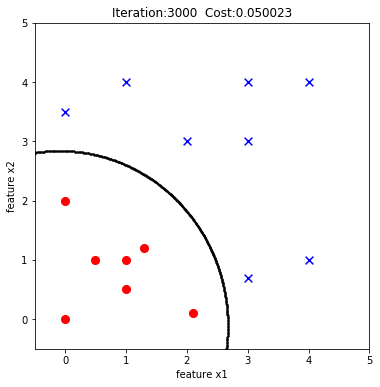

In [11]:
plt.figure(figsize = (6, 6))
plt.xlim((-0.5, 5));plt.ylim((-0.5, 5))
plt.xlabel('feature x1');plt.ylabel('feature x2')
plt.scatter(X0, Y0, s=50, marker='o', c='r', linewidths=2)
plt.scatter(X1, Y1, s=60, marker='x', c='b', linewidths=2)

x1 = np.linspace(-1, 5, 600)
a = theta4
b = theta2
for i in x1:
    c = theta0 + theta1 * i + theta3 * (i**2)
    if (b**2 - 4*a*c) < 0:
        continue
    
    r1 = (-b + math.sqrt(b**2 - 4*a*c)) / (2*a)
    r2 = (-b - math.sqrt(b**2 - 4*a*c)) / (2*a)
    plt.plot(i, r1, marker='o', color='black', markersize=1)
    plt.plot(i, r2, marker='o', color='black', markersize=1)
    
x2 = np.linspace(-1, 5, 600)
a = theta3
b = theta1
for i in x2:
    c = theta0 + theta2 * i + theta4 * (i**2)
    if (b**2 - 4*a*c) < 0:
        continue
    
    r1 = (-b + math.sqrt(b**2 - 4*a*c)) / (2*a)
    r2 = (-b - math.sqrt(b**2 - 4*a*c)) / (2*a)
    plt.plot(r1, i, marker='o', color='black', markersize=1)
    plt.plot(r2, i, marker='o', color='black', markersize=1)
    
    
plt.title('Iteration:' + '%s' % iteration + '  Cost:' + '%s'% round(J, 6))
plt.show() 